#Loading Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', delimiter = ',')

In [ ]:
dataset.shape

(303, 14)

#EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print("Null values/missing values -")

dataset.isnull().values.any()

Null values/missing values -


False

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print("attributes are - ")

dataset.columns

attributes are - 


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
cat_val = [] #Categorical Values
cont_val = [] #Continous Values
for column in dataset.columns:
    print('###################################')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        cat_val.append(column)
    else:
        cont_val.append(column)

###################################
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
###################################
sex : [1 0]
###################################
cp : [3 2 1 0]
###################################
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
###################################
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 

In [ ]:
print("Knowing the type of atrributes --- ")
print()
print("Categorical attributes :")
for i in cat_val:
  print(i)

print()

print("Contionus attributes :")
for i in cont_val:
  print(i)

Knowing the type of atrributes --- 

Categorical attributes :
sex
cp
fbs
restecg
exang
slope
ca
thal
target

Contionus attributes :
age
trestbps
chol
thalach
oldpeak


In [ ]:
for f in cat_val:
    print(f,':')
    print(dataset[f].value_counts())
    print("=============================")

sex :
1    207
0     96
Name: sex, dtype: int64
cp :
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
fbs :
0    258
1     45
Name: fbs, dtype: int64
restecg :
1    152
0    147
2      4
Name: restecg, dtype: int64
exang :
0    204
1     99
Name: exang, dtype: int64
slope :
2    142
1    140
0     21
Name: slope, dtype: int64
ca :
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
thal :
2    166
3    117
1     18
0      2
Name: thal, dtype: int64
target :
1    165
0    138
Name: target, dtype: int64


In [ ]:
for f in cont_val:
    print(f,':')
    print(dataset[f].value_counts())
    print("=============================")

age :
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
trestbps :
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64
chol :
204    6
197    6
234    6
269    5
254    5
      ..
284    1
2

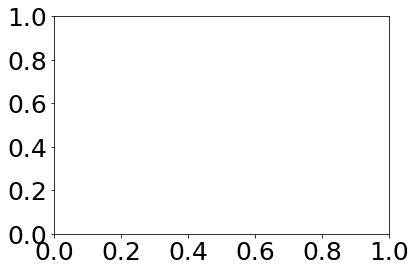

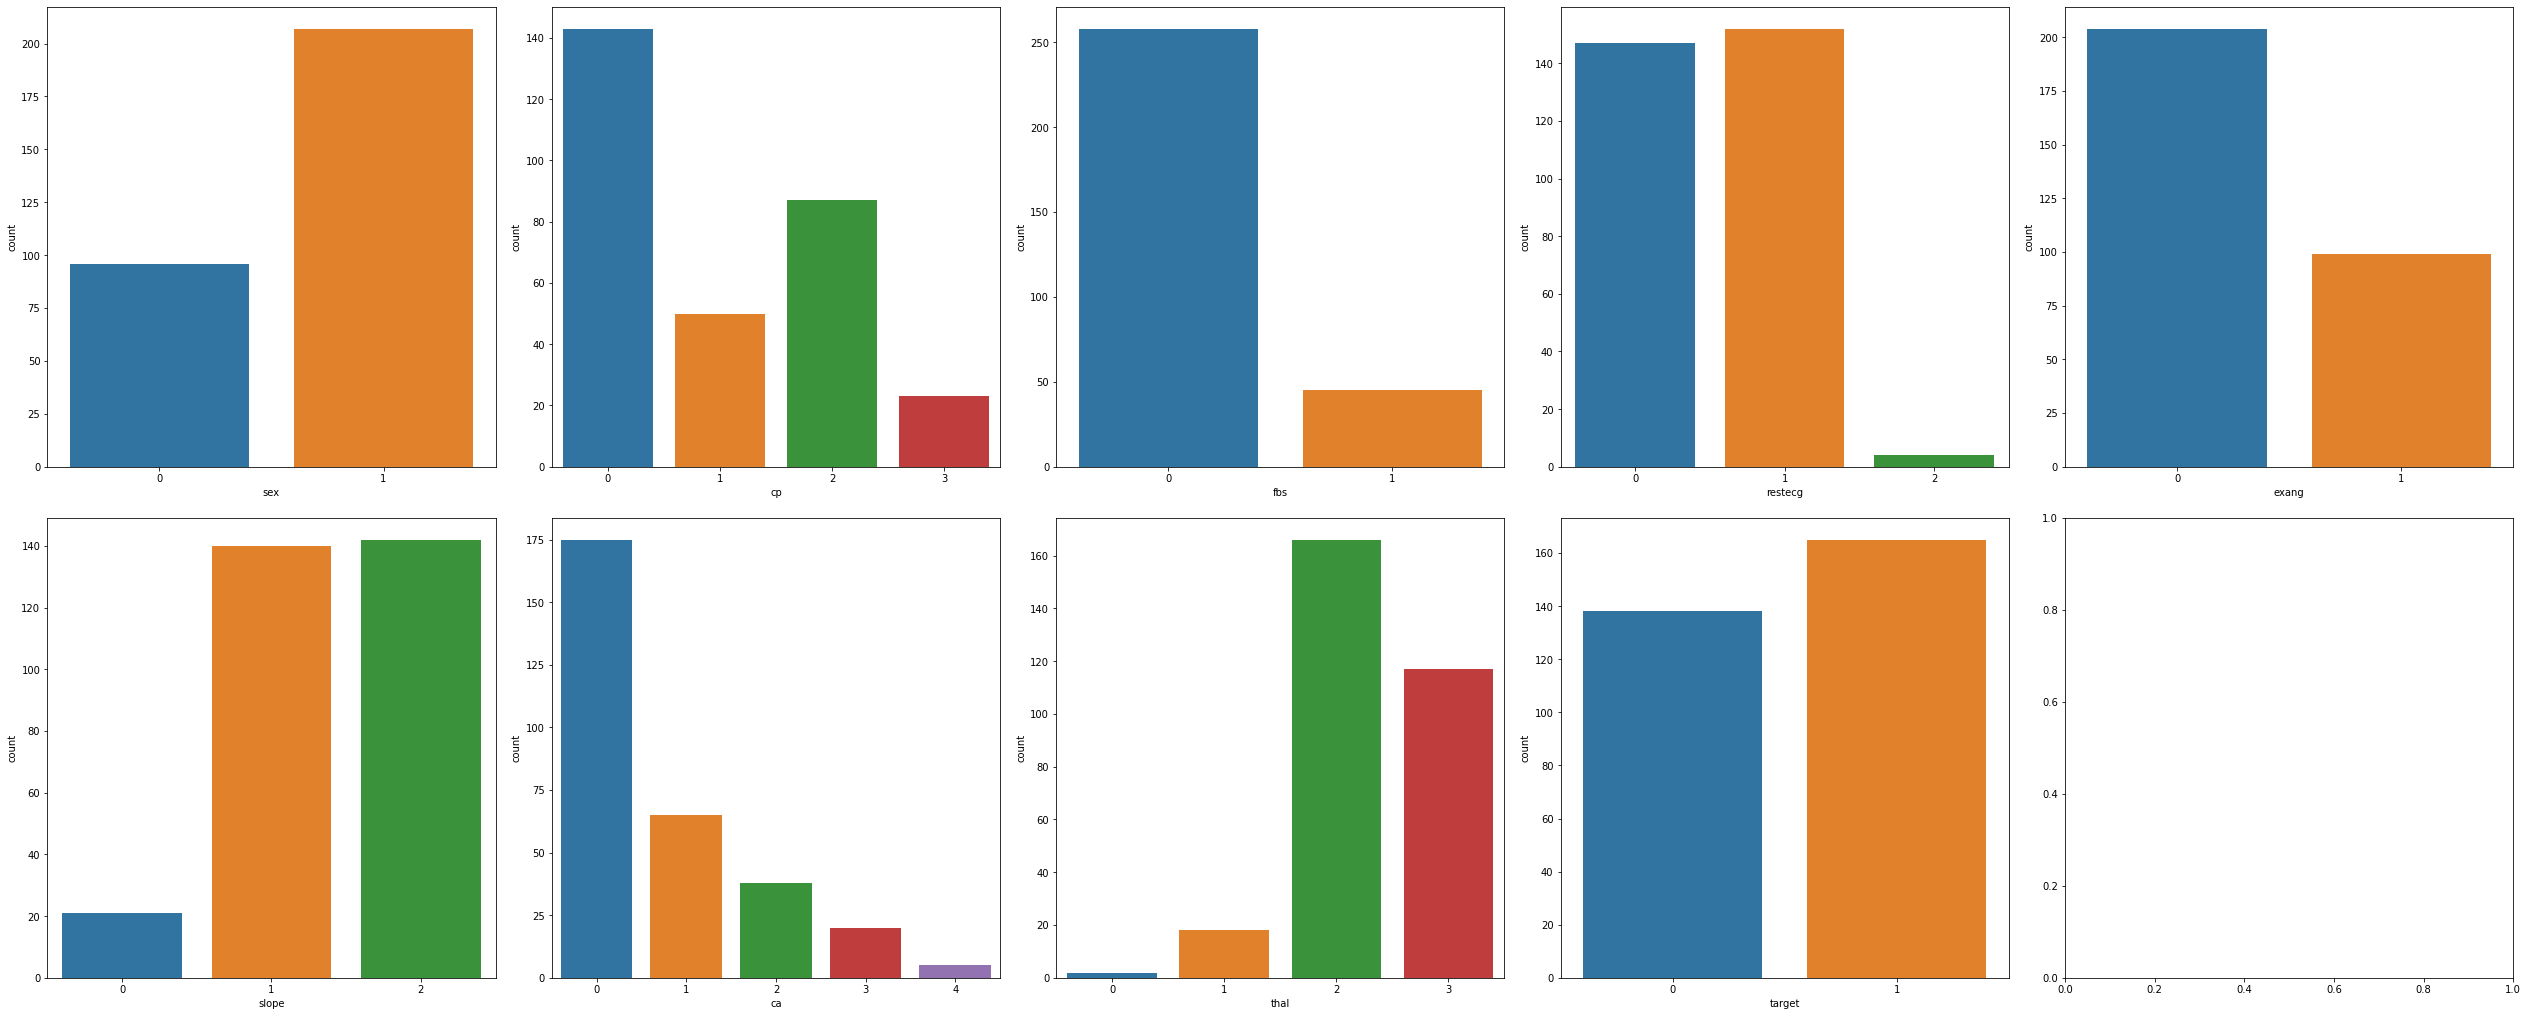

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xticks(size = 25)
plt.yticks(size = 25)

num_plots = len(cat_val)
total_cols = 5
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i,var in enumerate(cat_val):
     row = i//total_cols
     pos = i % total_cols
     plot = sns.countplot(x=var, data=dataset, ax=axs[row][pos])

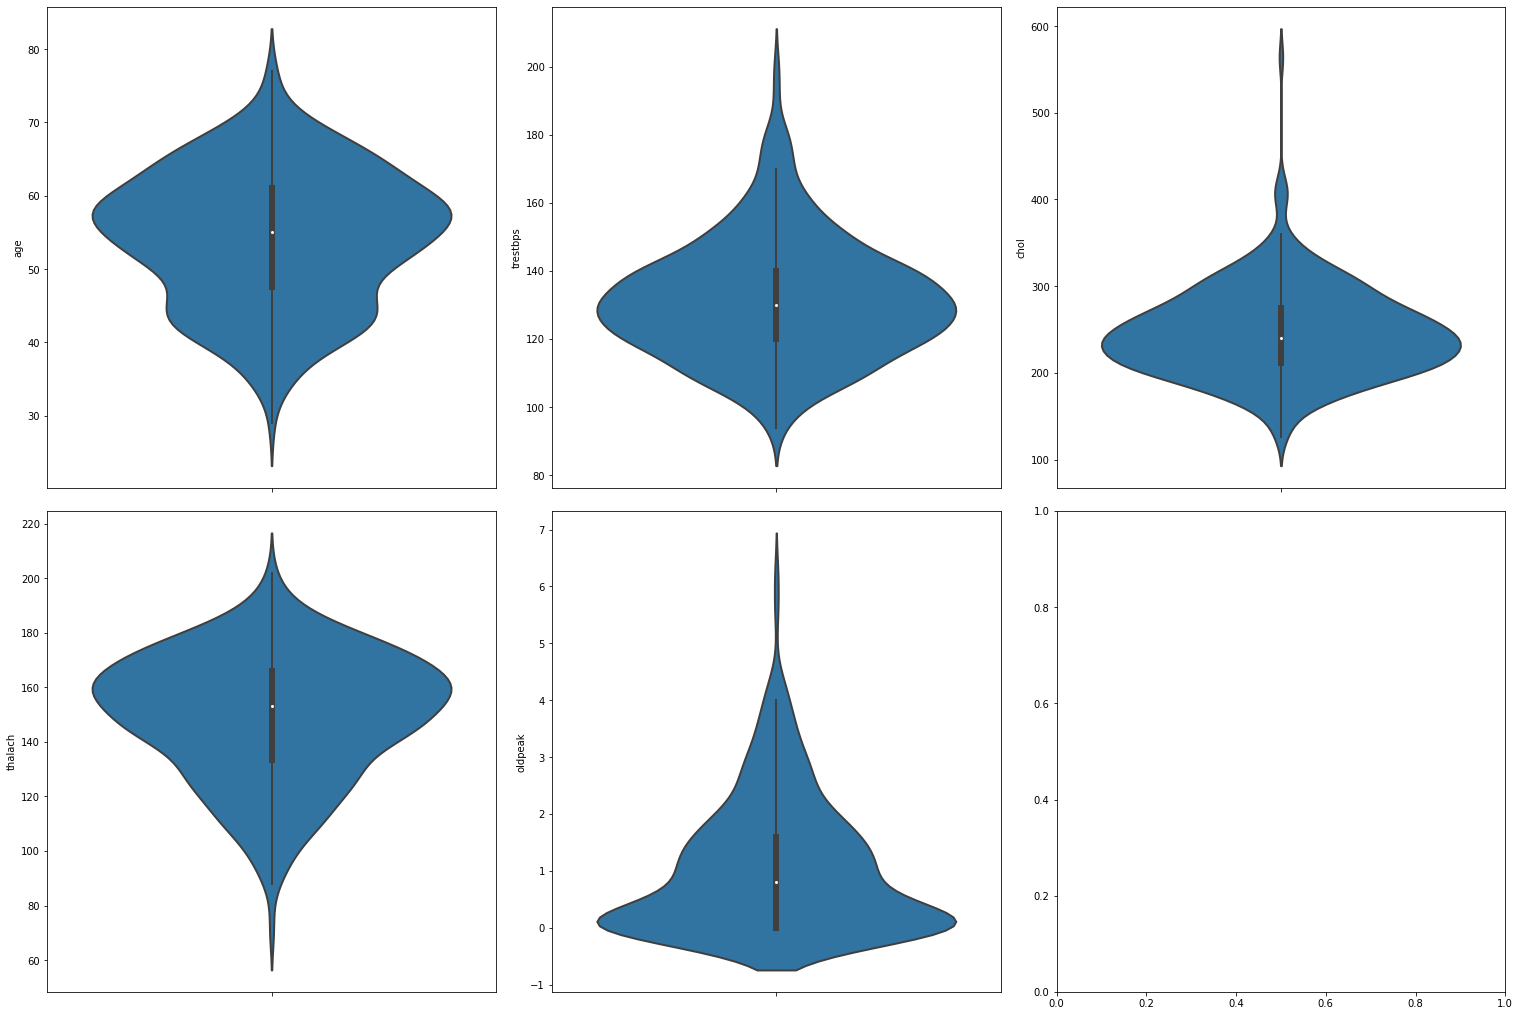

In [ ]:
num_plots = len(cont_val)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cont_val):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=dataset, ax=axs[row][pos], linewidth=2)

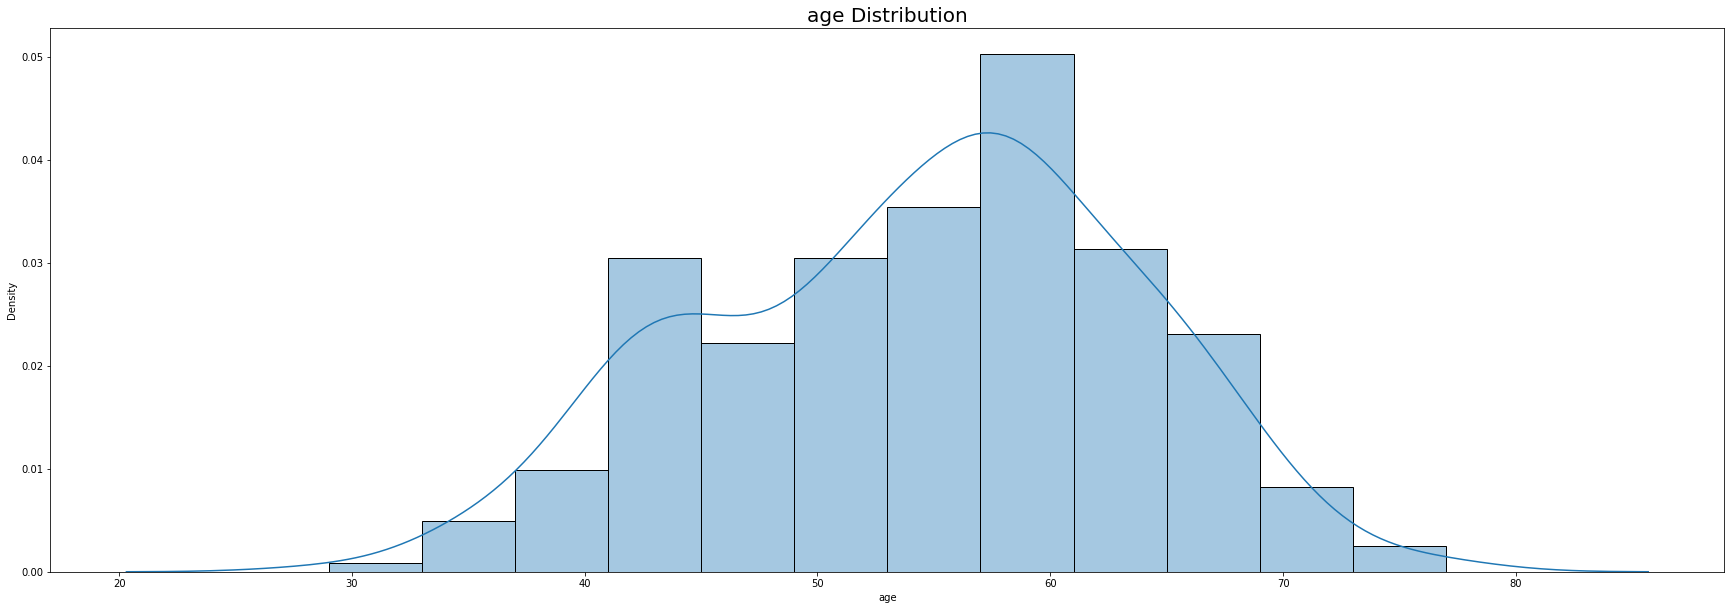

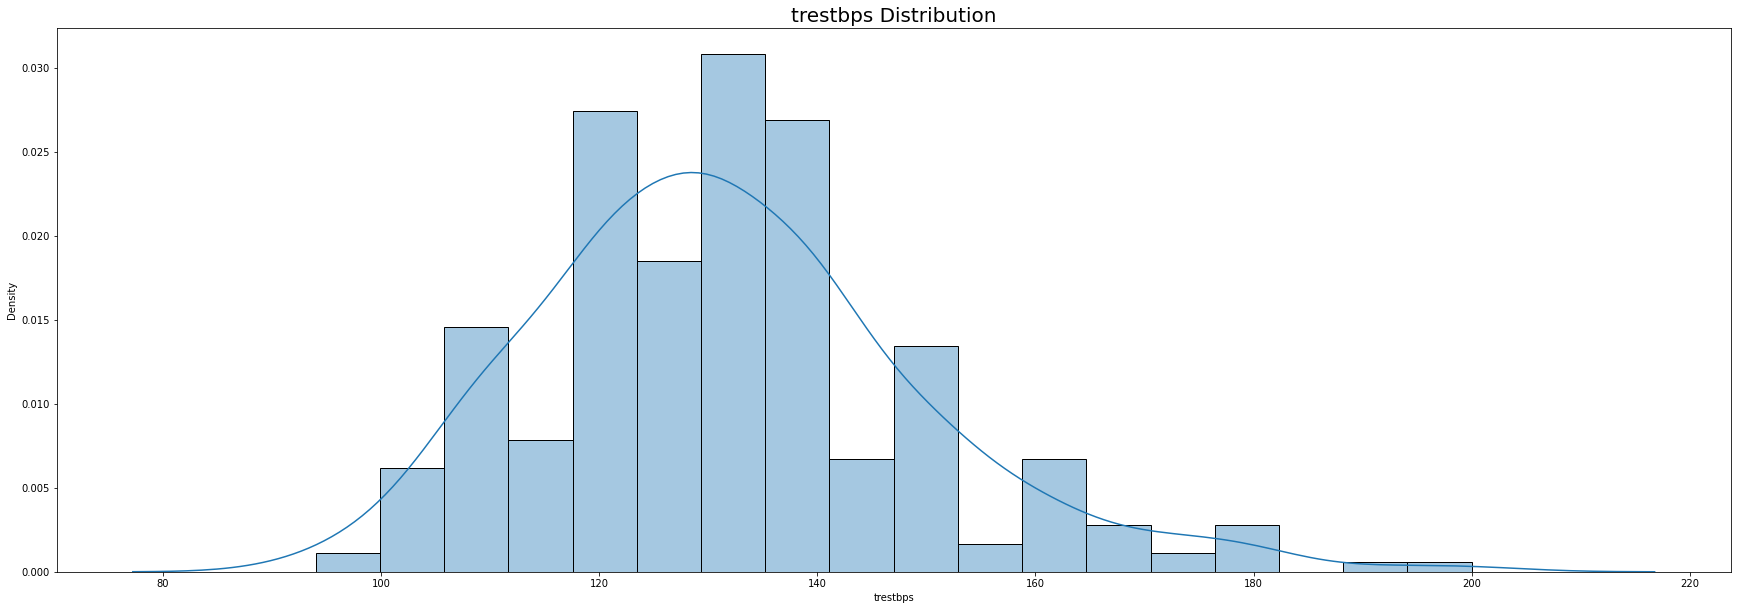

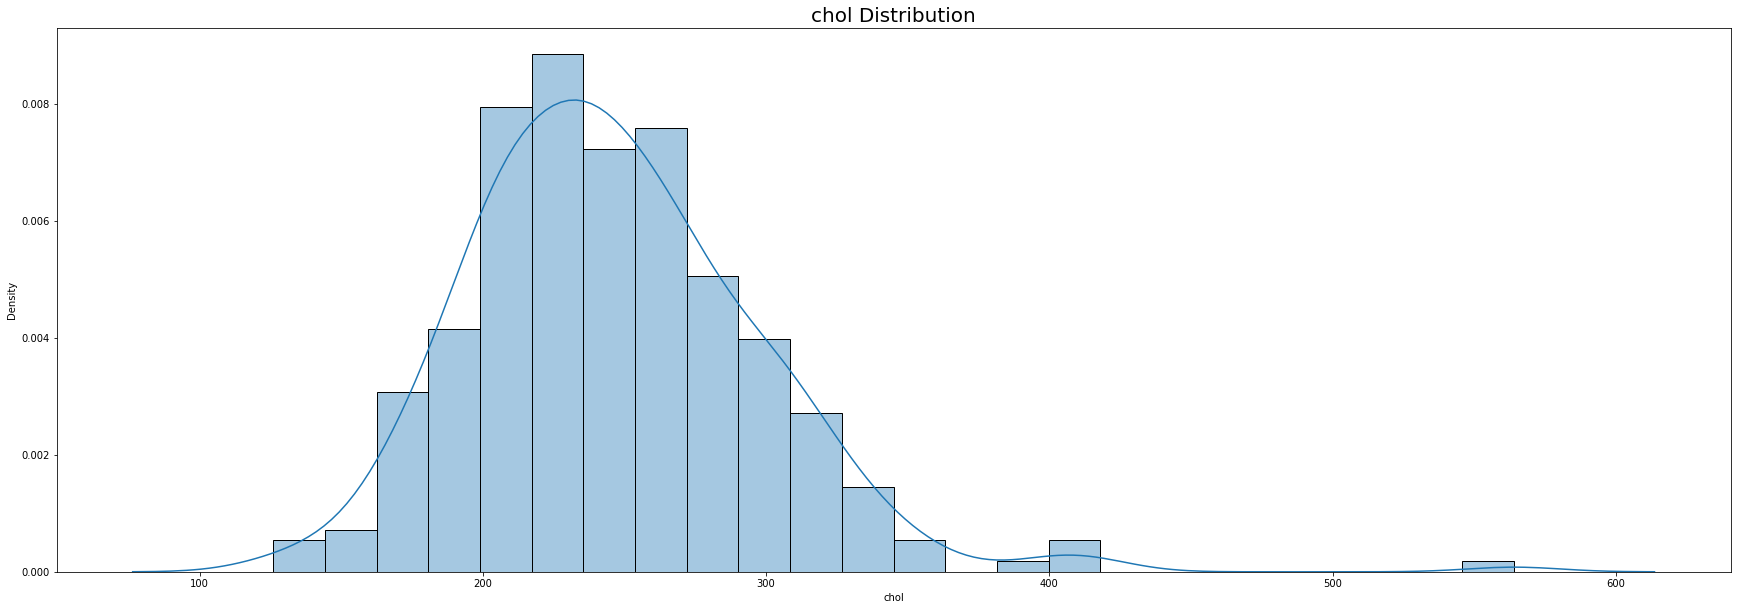

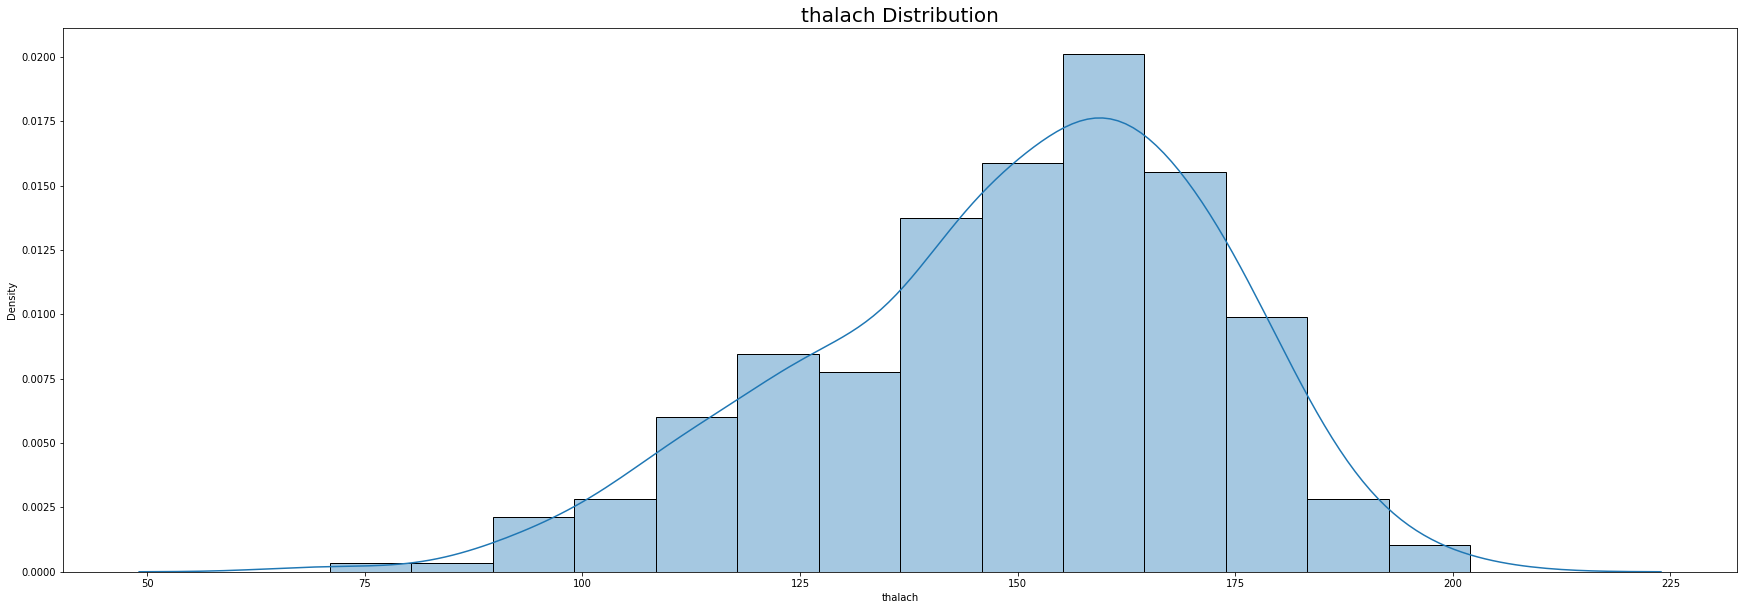

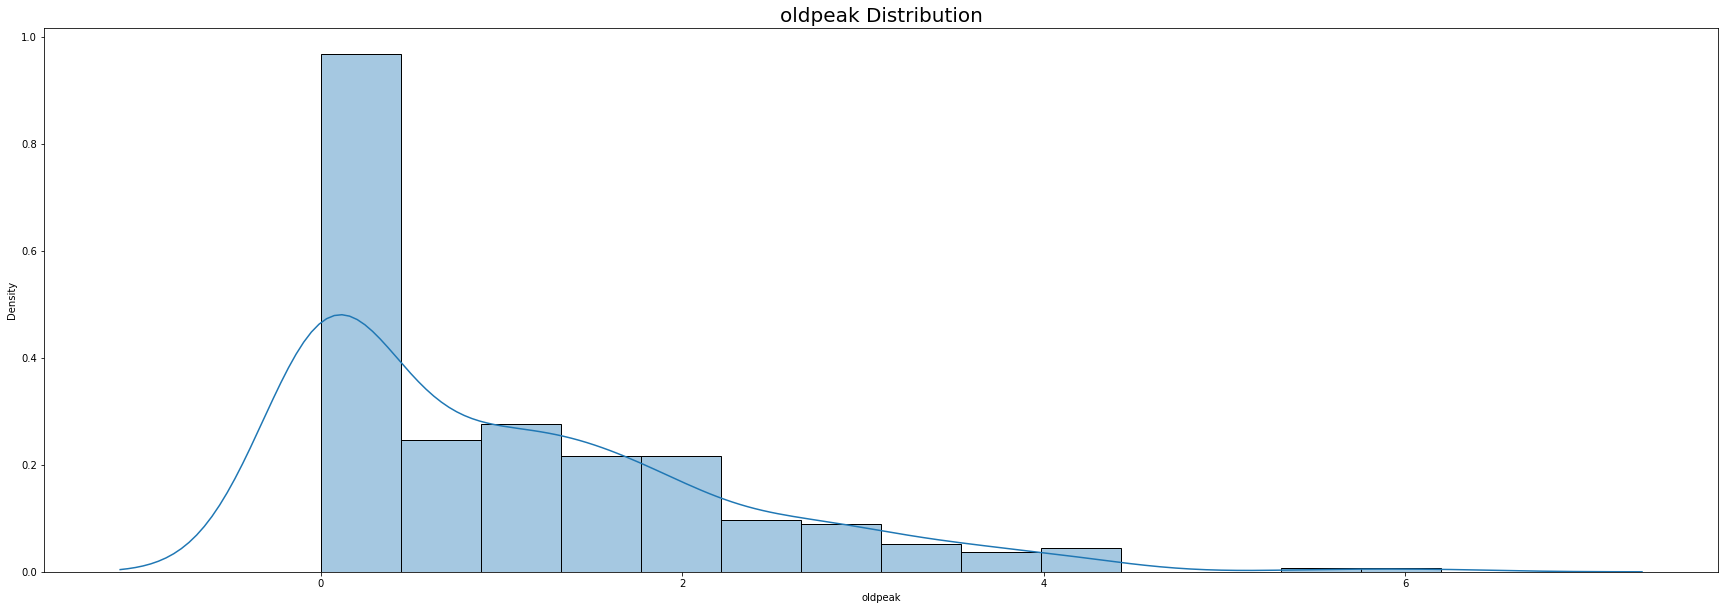

In [ ]:
for f in cont_val:
    plt.figure(figsize=(30, 10), facecolor='w')
    sns.histplot(data=dataset[f],stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
    #sns.distplot(dataset[f])
    plt.title('{} Distribution'.format(f), fontsize=20)
    plt.show()

In [ ]:
print("correlations among attributes - closer to +/- 1 are more likely to be related")
print()
correlation=dataset.corr()
correlation

correlations among attributes - closer to +/- 1 are more likely to be related



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


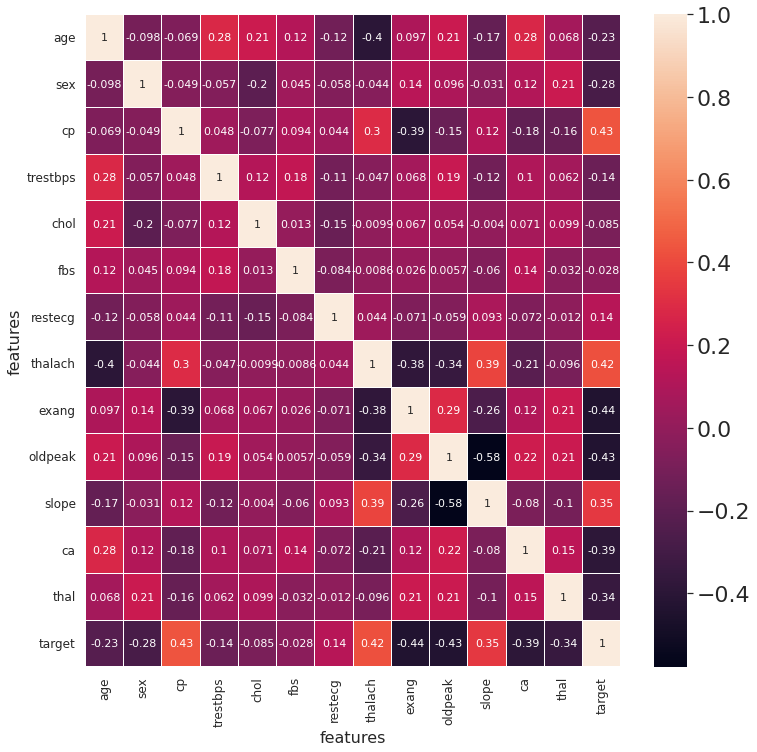

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),linewidth=.02,annot=True,annot_kws={'size': 11})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)
plt.savefig('correlationfigure.eps')
plt.show()
files.download('correlationfigure.eps')

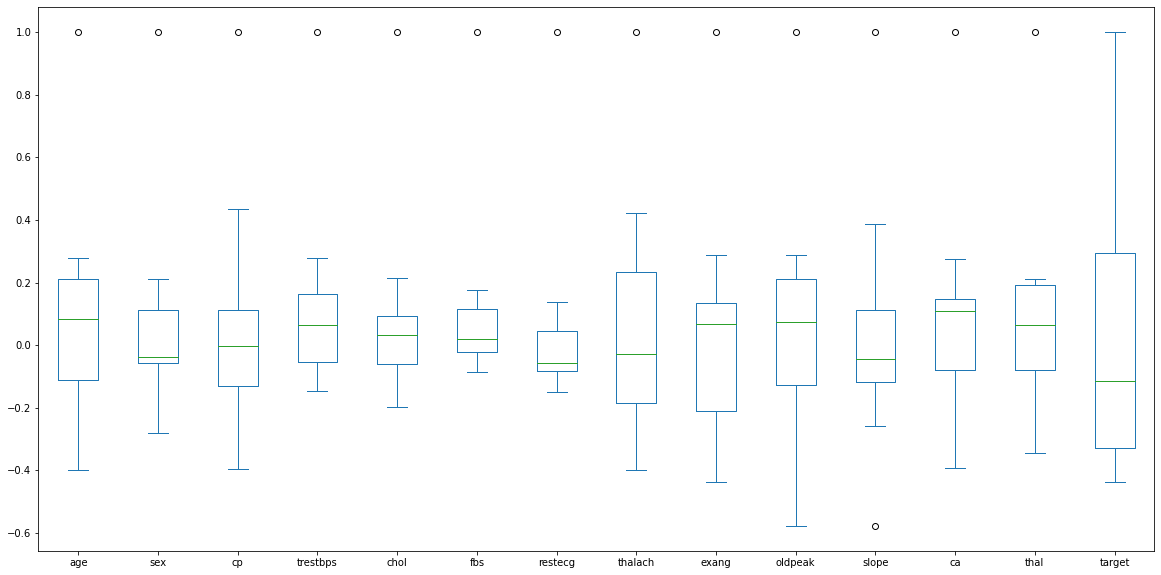

In [ ]:
correlation.plot(kind="box",figsize=(20,10))

In [ ]:
print("sorting the correlation among attributes corresponding with target- ")

pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False)

sorting the correlation among attributes corresponding with target- 


,target
target,1.000000
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcda5cb2e50>,
      dtype=object)

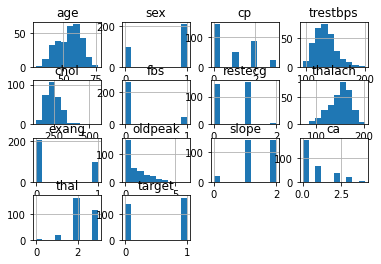

In [ ]:
dataset.hist()

0 - absence of HD
1 - presence of HD
1    165
0    138
Name: target, dtype: int64


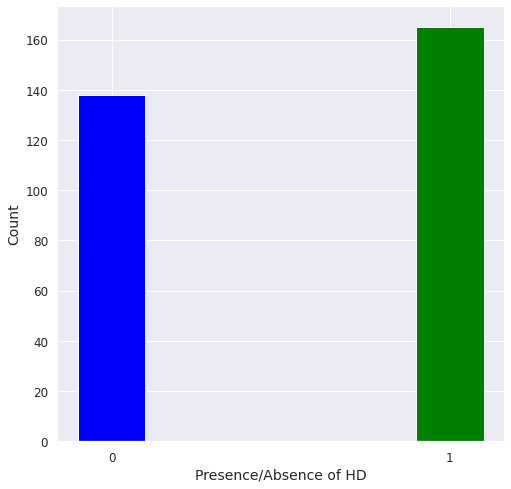

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from matplotlib.pyplot import rcParams

print("0 - absence of HD")
print("1 - presence of HD")

print(dataset.target.value_counts())

# 0 - absence of HD
# 1 - presence of HD

rcParams['figure.figsize'] = 8,8
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['green', 'blue'],width=0.2)
plt.xticks([0, 1])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Presence/Absence of HD', size = 14)
plt.ylabel('Count',size=14)
#plt.title('Count of each Target Class', size = 25)
plt.savefig('target-count.eps')
plt.show()
files.download('target-count.eps')

sex


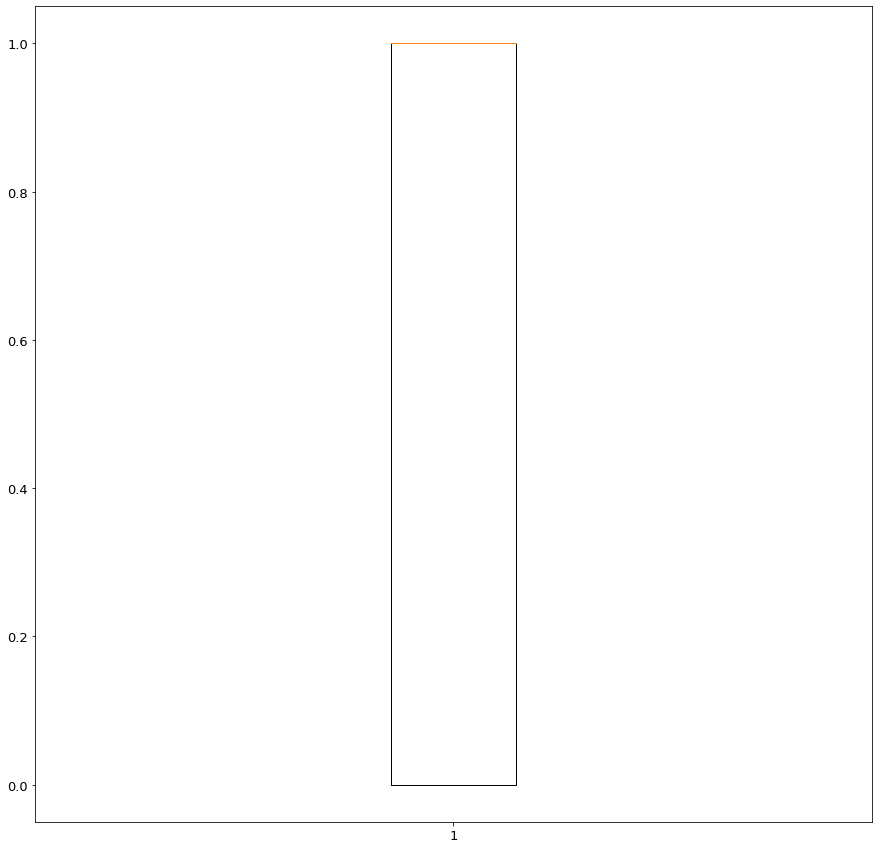

cp


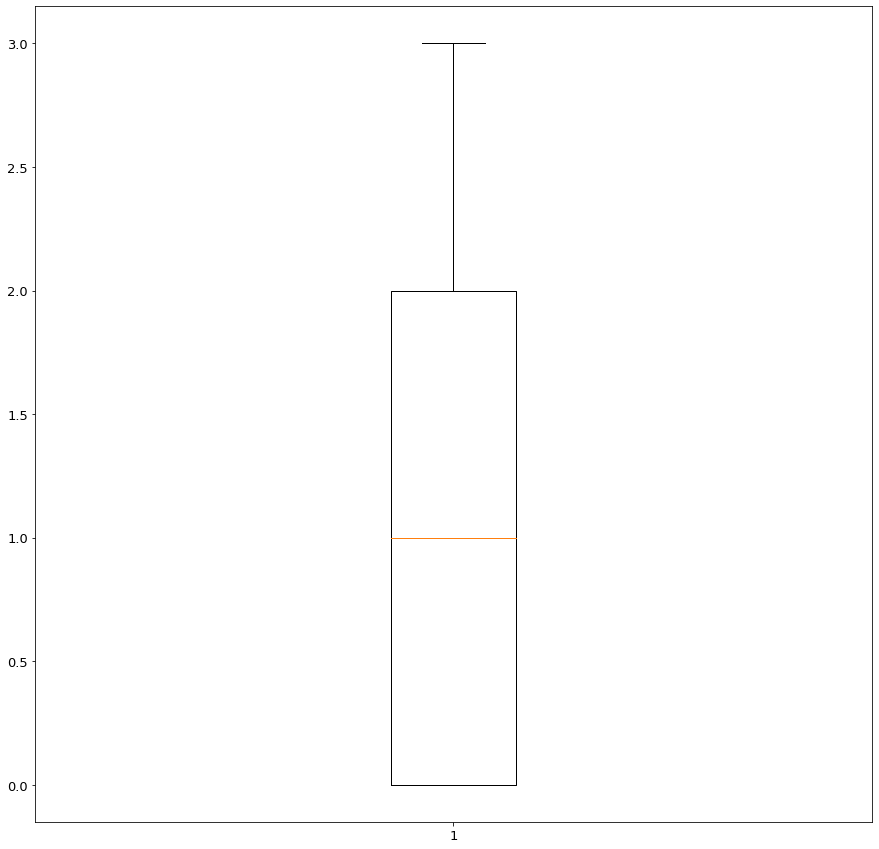

fbs


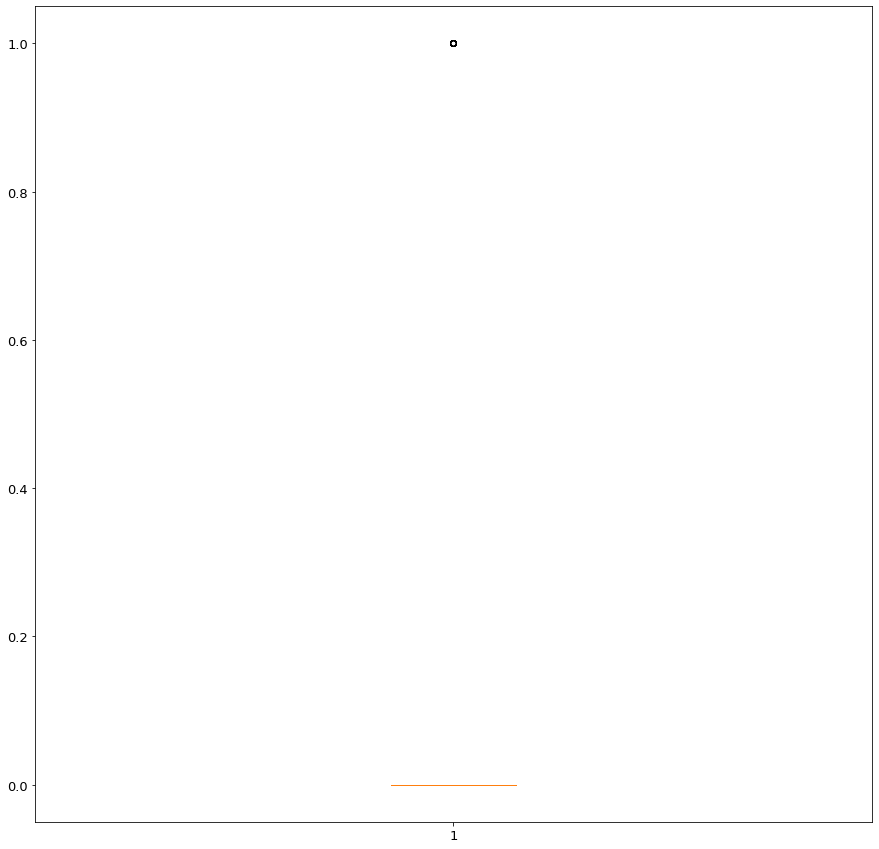

restecg


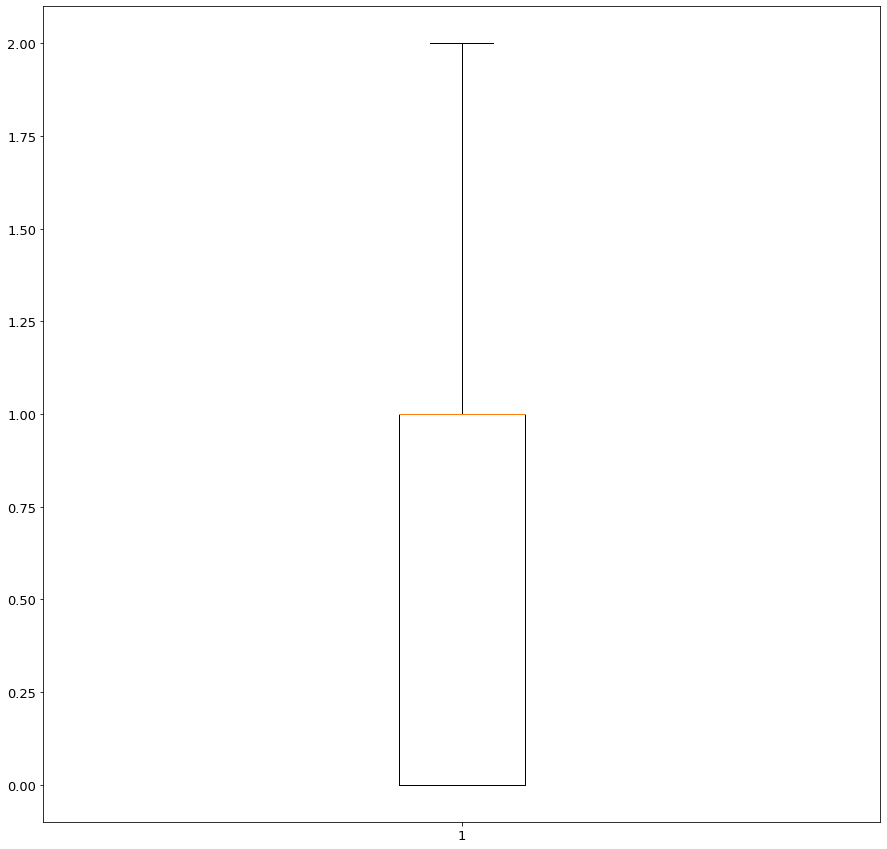

exang


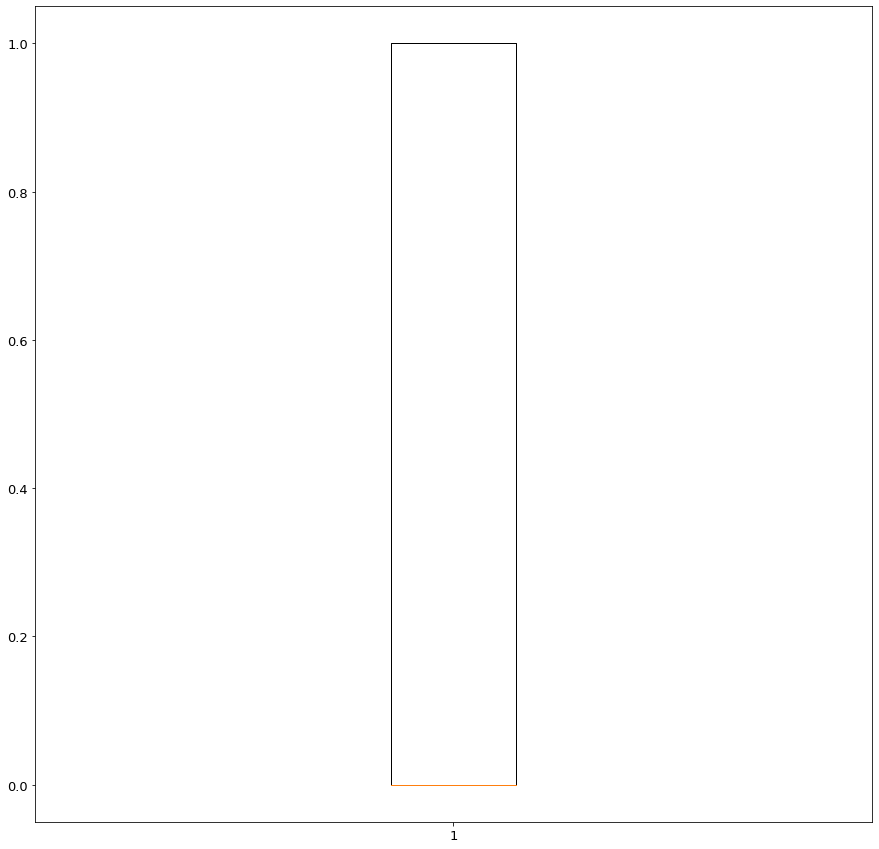

slope


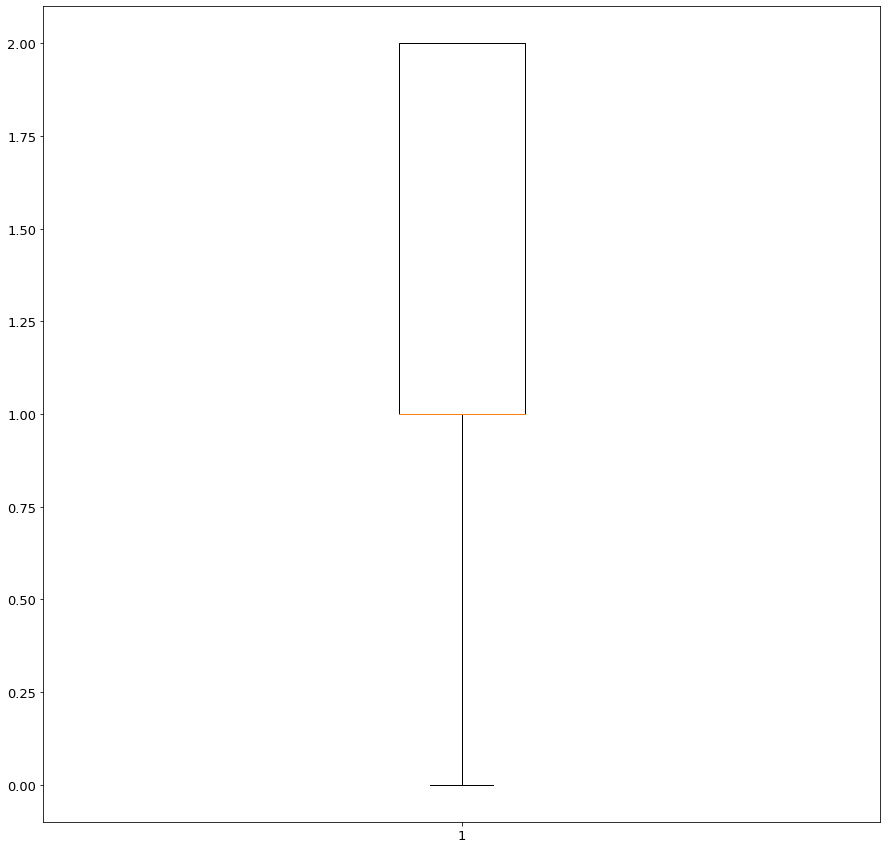

ca


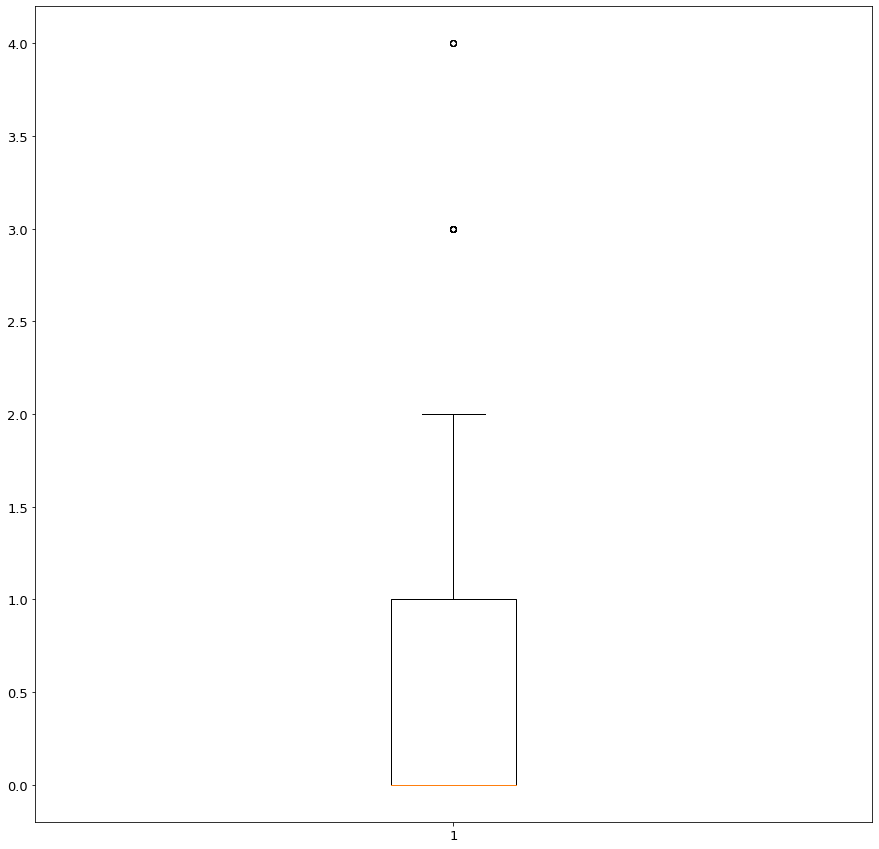

thal


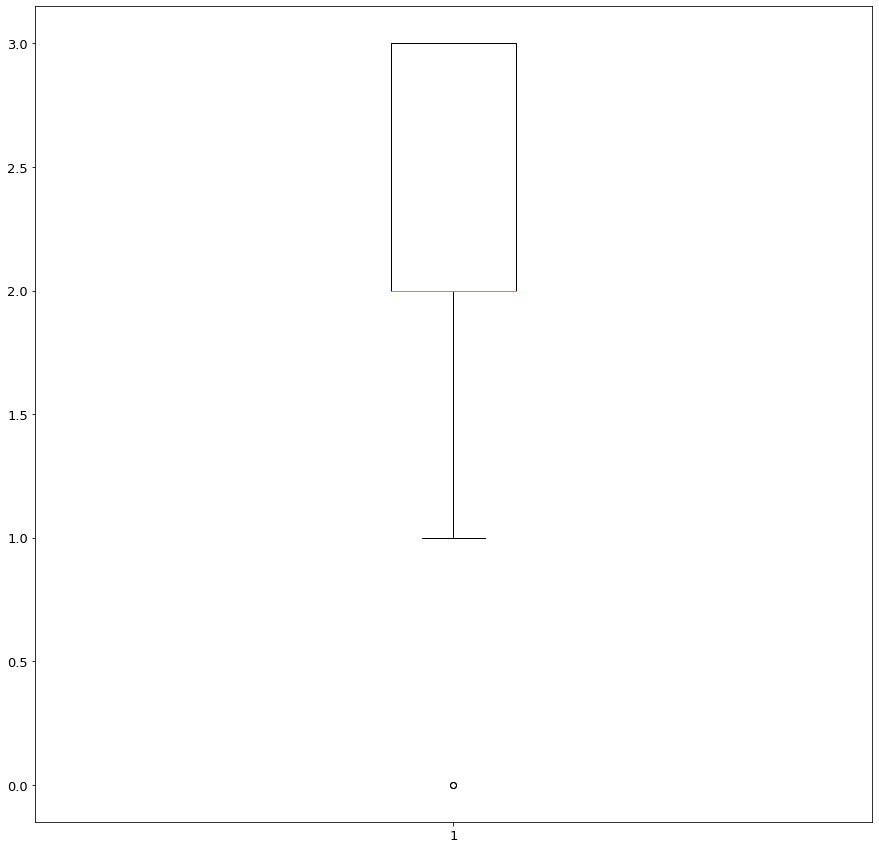

target


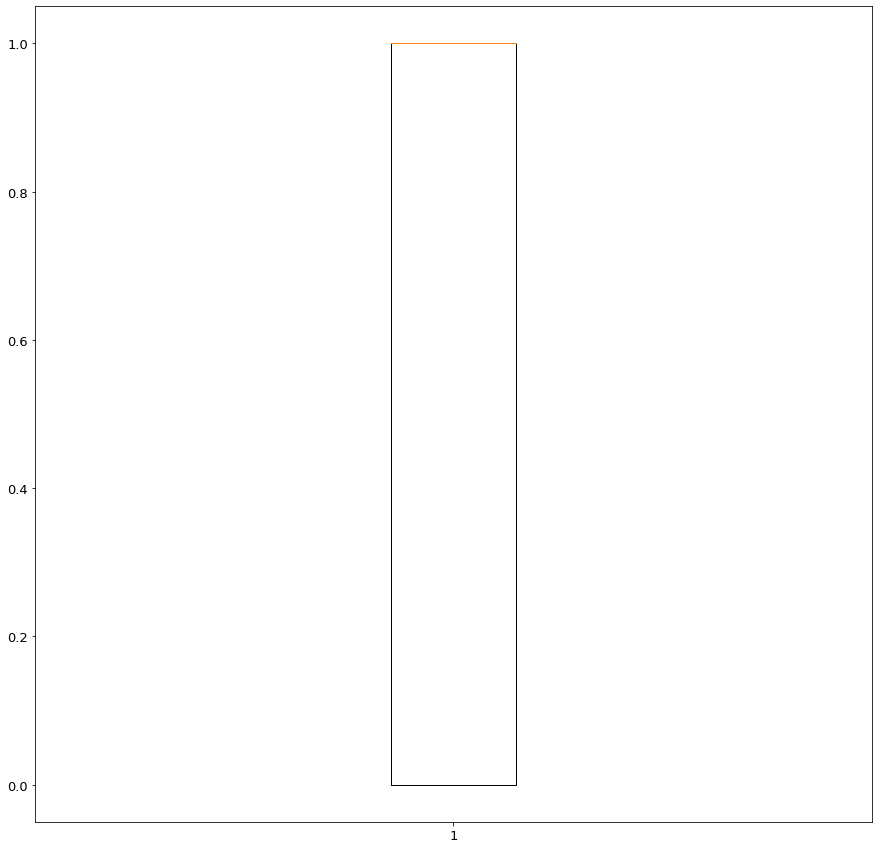

In [ ]:
for i in cat_val:
 print(i)
 plt.figure(figsize=(15,15))
 plt.boxplot(dataset[i])
 plt.xticks(size = 13)
 plt.yticks(size = 13)
 plt.show()

age


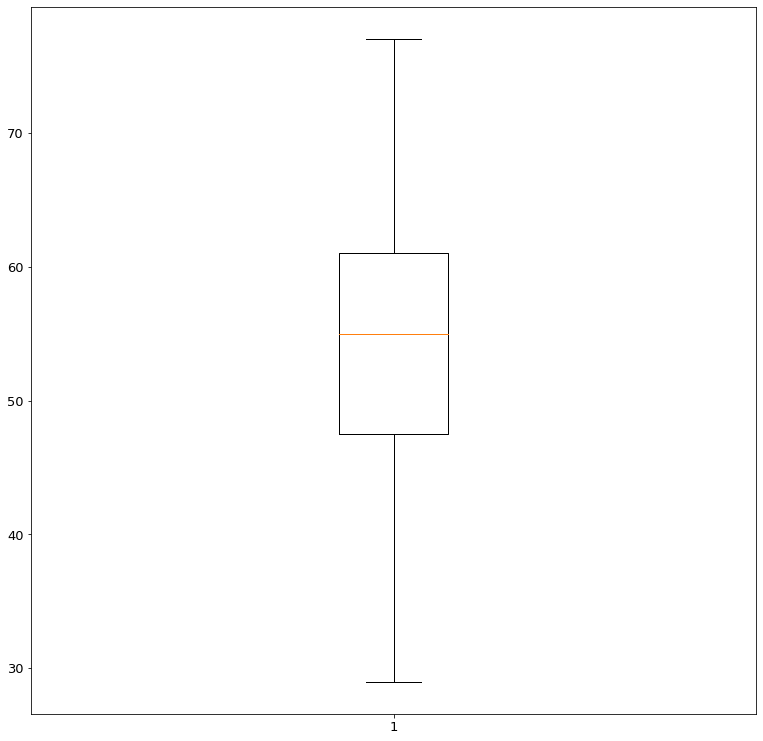

trestbps


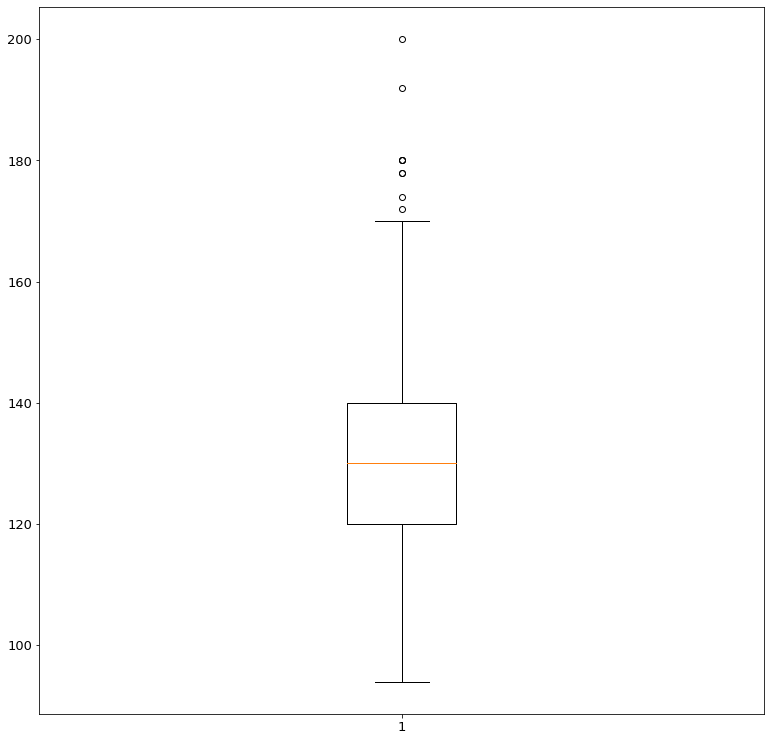

chol


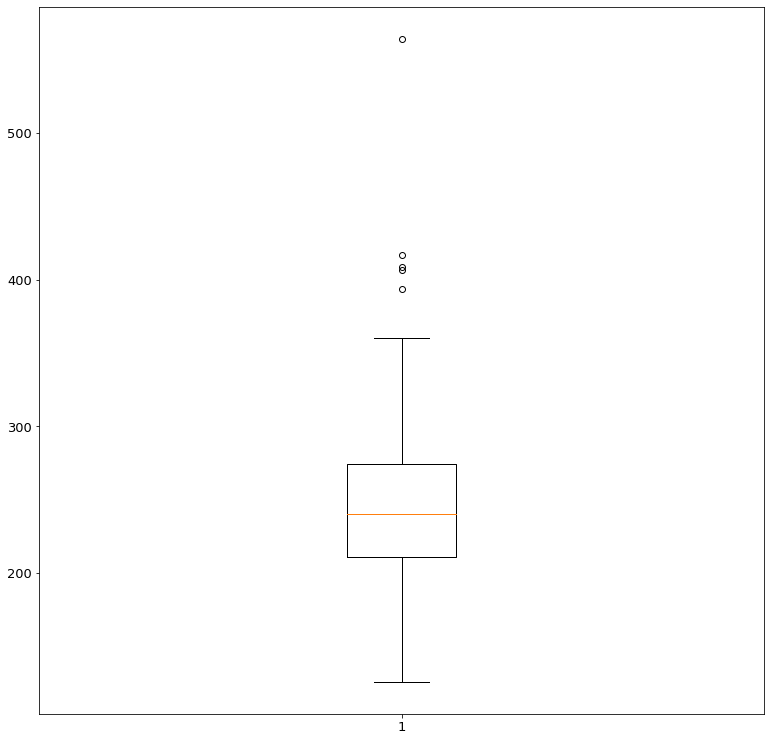

thalach


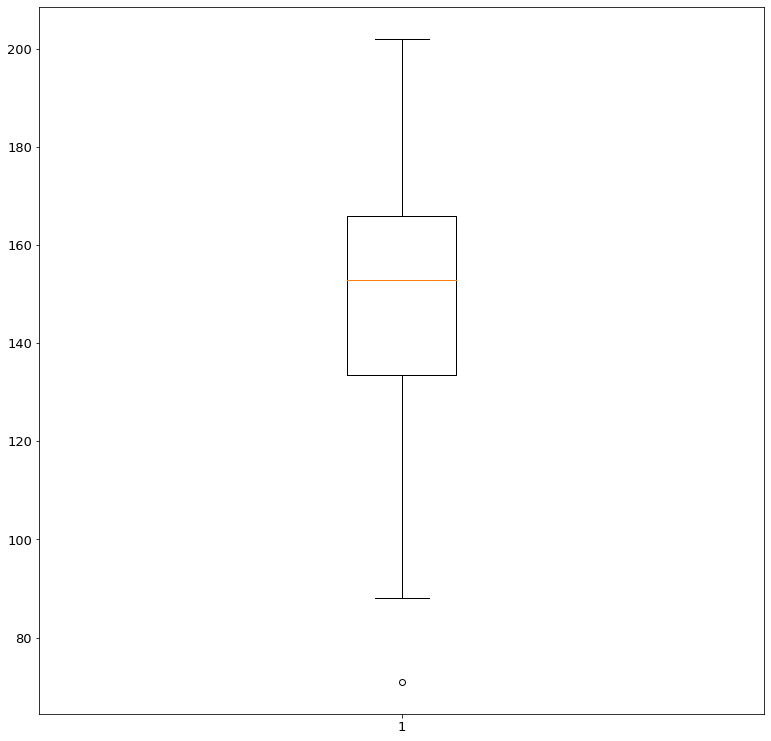

oldpeak


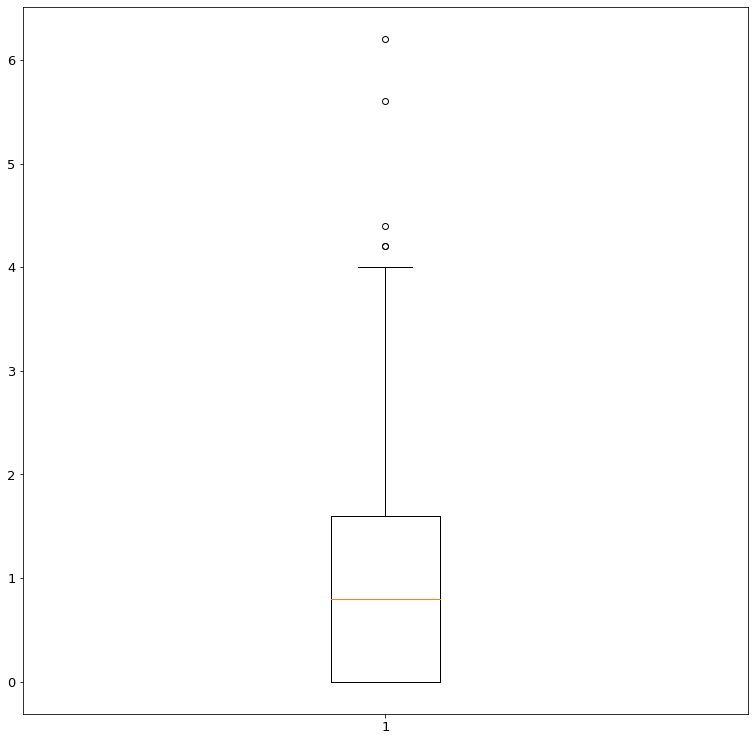

In [ ]:
for i in cont_val:
 print(i)
 plt.figure(figsize=(13,13))
 plt.boxplot(dataset[i])
 plt.xticks(size = 13)
 plt.yticks(size = 13)
 plt.show()

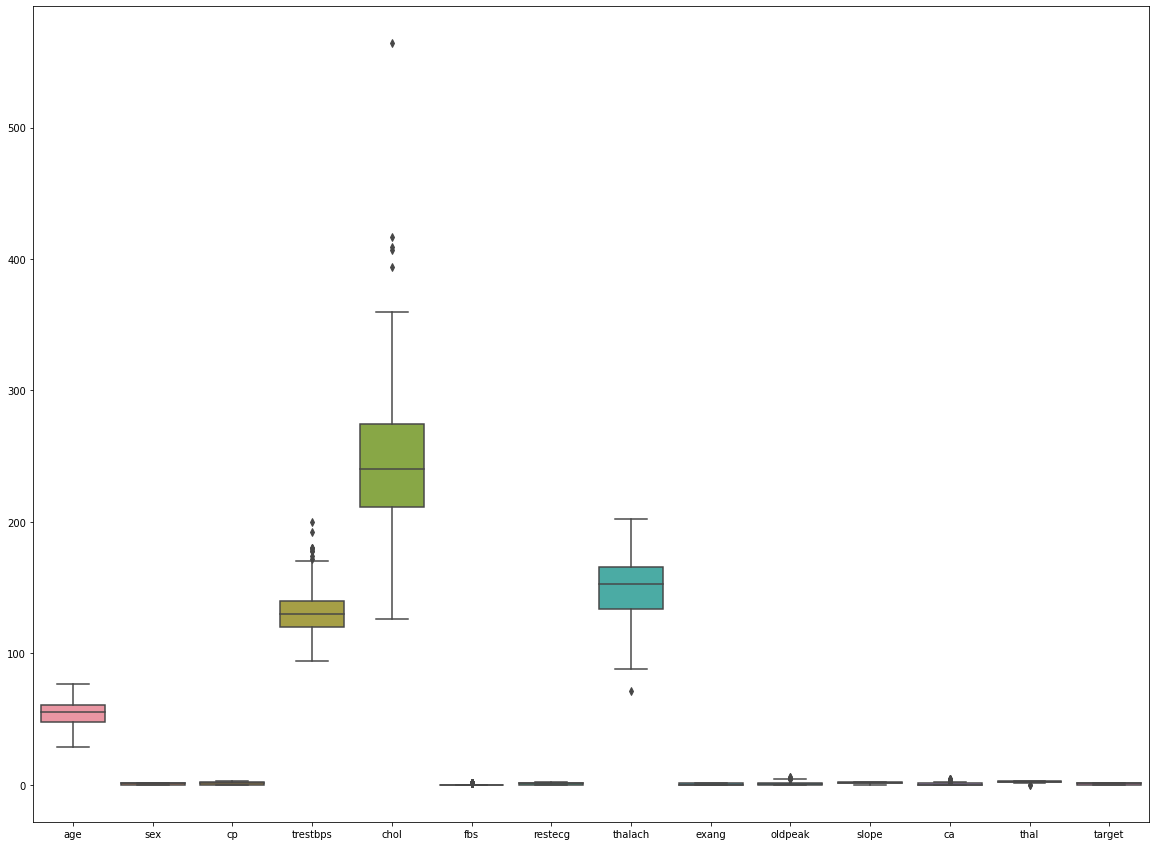

In [ ]:
plt.figure(figsize=(20,15), facecolor='w')
sns.boxplot(data=dataset)
plt.show()

#Outlier Analysis

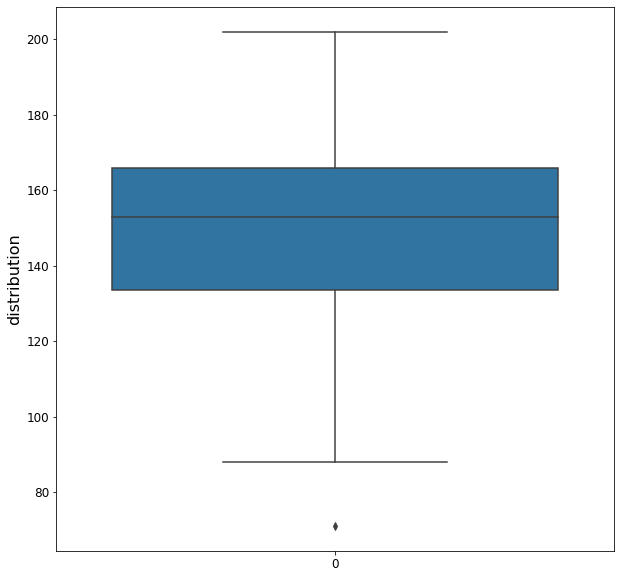

In [ ]:
plt.figure(figsize=(10,10), facecolor='w')
sns.boxplot(data=dataset['thalach'])
plt.xticks(size = 12)
plt.yticks(size = 12)
#plt.xlabel('thalach', fontsize=14)
plt.ylabel('distribution', fontsize=16)
plt.savefig('thalach.eps')
plt.show()
#files.download('thalach.eps')

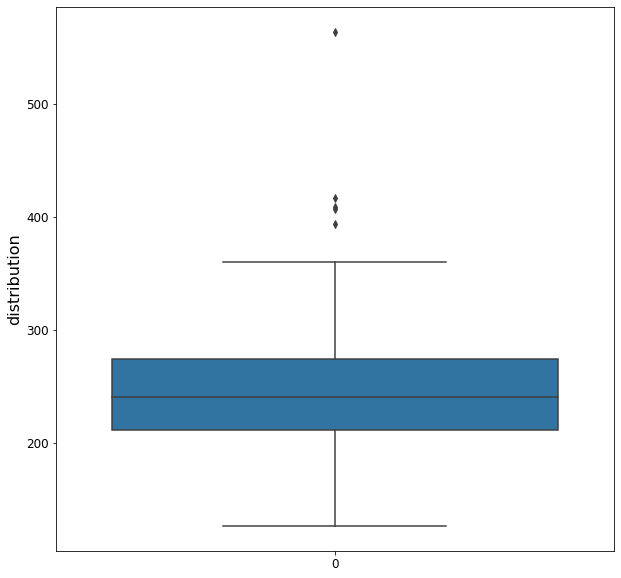

In [ ]:
plt.figure(figsize=(10,10), facecolor='w')
sns.boxplot(data=dataset['chol'])
plt.xticks(size = 12)
plt.yticks(size = 12)
#plt.xlabel('chol', fontsize=16)
plt.ylabel('distribution', fontsize=16)
plt.savefig('chol.eps')
plt.show()
#files.download('chol.eps')

In [ ]:
print("Outlier present at ",dataset['chol'].max())
print("For the Feature ");'chol'

Outlier present at  564
For the Feature 


'chol'

In [ ]:
dataset['thalach'].min()
print("Outlier present at ",dataset['thalach'].min())
print("For the Feature ");'thalach'

Outlier present at  71
For the Feature 


'thalach'

In [ ]:
dataset = dataset[dataset['thalach']<564.0]
dataset = dataset[dataset['chol']>71.0]
dataset.shape

(303, 14)

#Z-Score

In [ ]:
from scipy import stats
import numpy as np

def Zscore(data,threshold):
 z = np.abs(stats.zscore(data))
 res = np.where(z > threshold)
 #print("Length:", len(res[0]), ":", len(res[1]))
 #print("Rows:",res[0])
 #print("Columns:",res[1])
 outliers_row = []
 for j in res[0]:
     r = []
     for i in data.columns:
        r.append(data[i][j])
     outliers_row.append(r)
 outliers_data = pd.DataFrame(data=outliers_row, columns = data.columns)
 return outliers_data

In [ ]:
Zscore(dataset,4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
1,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0


#DBSCAN 

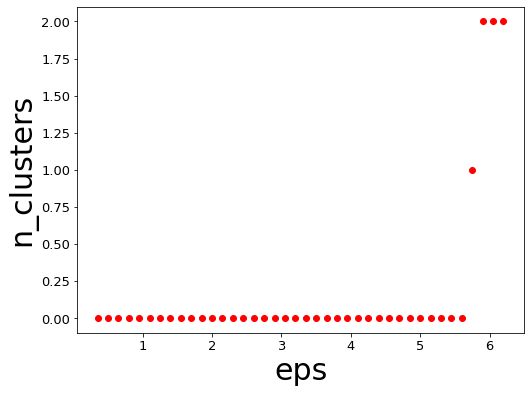

In [ ]:
from sklearn.cluster import DBSCAN

X = dataset.drop(['target'], axis=1)

eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=3).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.xticks(size = 13)
plt.yticks(size = 13)    
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

def findOutliers(X):
  model = DBSCAN(eps=6.0, min_samples=3).fit(X)
  labels=model.labels_
  count= Counter(model.labels_)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  outliers = dataset[model.labels_ != -1];
  return outliers

In [ ]:
findOutliers(dataset.drop(['target'], axis=1))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0


#Feature Selection

In [ ]:
from sklearn.feature_selection import chi2

X = dataset.drop('target',axis=1)
y = dataset['target']

#print("The total features  :",X.shape)
#print("The Feature Outcome :",y.shape)

print("Chi-Squared values for the data -",X.shape,y.shape)
chi_scores = chi2(X,y)
chi_scores

Chi-Squared values for the data - (303, 13) (303,)


(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

p_value >0.05 hence fbs,restecg,thal does not have significance on target variable.

fbs         6.523632e-01
restecg     8.438939e-02
thal        1.610061e-02
sex         5.912318e-03
slope       1.741237e-03
trestbps    1.180286e-04
age         1.395673e-06
chol        9.957148e-07
exang       4.428074e-10
cp          2.534982e-15
ca          3.605677e-16
oldpeak     1.552583e-17
thalach     7.395102e-43
dtype: float64
age         1.395673e-06
sex         5.912318e-03
cp          2.534982e-15
trestbps    1.180286e-04
chol        9.957148e-07
fbs         6.523632e-01
restecg     8.438939e-02
thalach     7.395102e-43
exang       4.428074e-10
oldpeak     1.552583e-17
slope       1.741237e-03
ca          3.605677e-16
thal        1.610061e-02
dtype: float64


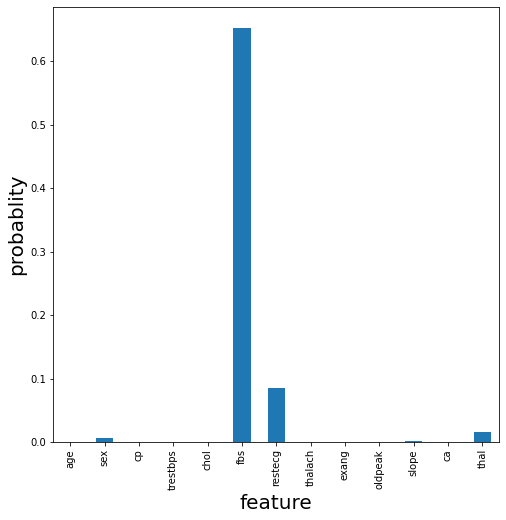

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
print(p_values)

p_values = pd.Series(chi_scores[1],index = dataset.columns[0:len(dataset.columns)-1])
print(p_values)

p_values.plot.bar()
plt.xlabel('feature', fontsize=20)
plt.ylabel('probablity', fontsize=20)
plt.savefig('chisq.png')
plt.show()
#files.download('chisq.png')

In [ ]:
from sklearn.feature_selection import SelectKBest

best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(dataset.columns[0:len(dataset.columns)-1])

scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['feature','score']
chi_ranks=[]
for i in range(1,len(X.columns)+1):
  chi_ranks.append(i)
#print(chi_ranks)
scores=scores.nlargest(13,'score')
scores['chi_sq']=chi_ranks
#print(scores.head(15))
scores=scores.sort_index(ascending=True)
print(scores.head(15))

     feature       score  chi_sq
0        age   23.286624       7
1        sex    7.576835      10
2         cp   62.598098       4
3   trestbps   14.823925       8
4       chol   23.936394       6
5        fbs    0.202934      13
6    restecg    2.978271      12
7    thalach  188.320472       1
8      exang   38.914377       5
9    oldpeak   72.644253       2
10     slope    9.804095       9
11        ca   66.440765       3
12      thal    5.791853      11


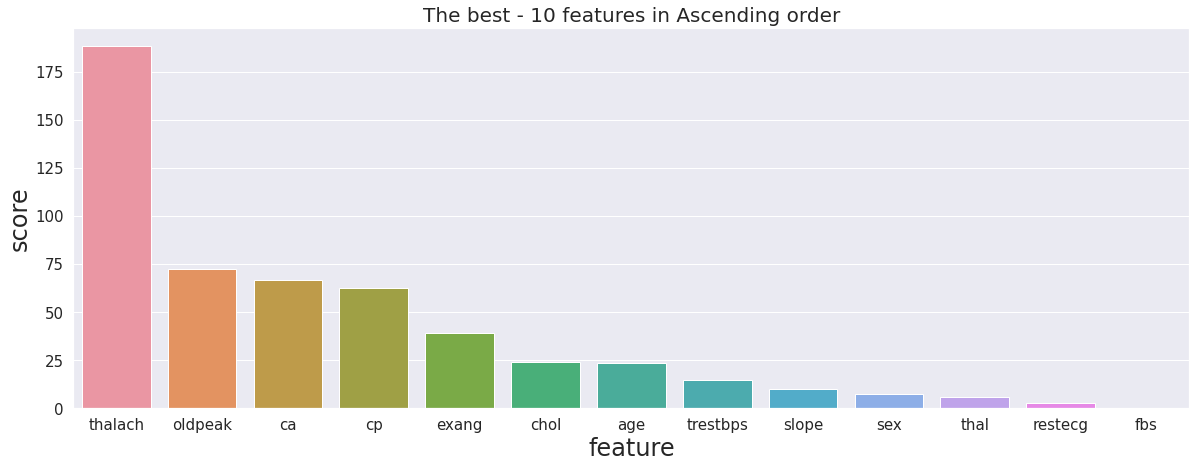

In [ ]:
scores=scores.sort_values(by="score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.set(font_scale = 2)
sns.barplot(x='feature',y='score',data=scores)
plt.title("The best - 10 features in Ascending order", size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [ ]:
best_features_chisquared=scores["feature"].tolist()[:13]
best_features_chisquared

['thalach',
 'oldpeak',
 'ca',
 'cp',
 'exang',
 'chol',
 'age',
 'trestbps',
 'slope',
 'sex',
 'thal',
 'restecg',
 'fbs']

In [ ]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

dataset.reset_index(drop=True, inplace=True)

X = dataset.drop('target',axis=1)
y = dataset.target

idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank')
#print(idx)
#print(dataset.columns[0:len(dataset.columns)-1])

#plotting the ranked_features
f_ranks=pd.DataFrame(dataset.columns[0:len(dataset.columns)-1])
f_ranks.columns=['feature']
f_ranks['fs_ranks']=idx
print(f_ranks.head(15))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.7 MB/s 
     feature  fs_ranks
0        age         4
1        sex        10
2         cp         3
3   trestbps         5
4       chol         1
5        fbs         2
6    restecg         0
7    thalach        11
8      exang        12
9    oldpeak         9
10     slope         6
11        ca         8
12      thal         7


In [ ]:
feature_selection = pd.DataFrame(dataset.columns[0:len(dataset.columns)-1])
feature_selection.columns=['feature']
feature_selection['chi_sq_score']=data_scores
feature_selection['chi_rank']=scores['chi_sq']

fs_ranks=[]
for i in idx:
  i=i+1
  fs_ranks.append(i)
#print(fs_ranks)

feature_selection['fs_ranks']=fs_ranks
#print(len(chi_ranks))
#print(len(fs_ranks))

chisq_rank=np.array(scores['chi_sq'].sort_index(ascending=True))
#print(chisq_rank)

final_score = [chisq_rank[i] * fs_ranks[i] for i in range(len(chisq_rank))]
#print(final_score)

feature_selection['multi_score']= final_score
#print(feature_selection.head(15))

#print(feature_selection.nsmallest(13,'multi_rank'))
#print(pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False))

#final_ranks=[3,2,1,4,5,6,7,8,9,10,11,12,13]

feature_selection=feature_selection.nsmallest(13,'multi_score')
feature_selection['final_rank']= chi_ranks

ordered=feature_selection.sort_index(ascending=True)

print(ordered.head(15))
print(feature_selection.head(15))

     feature  chi_sq_score  chi_rank  fs_ranks  multi_score  final_rank
0        age     23.286624         7         5           35           7
1        sex      7.576835        10        11          110          13
2         cp     62.598098         4         4           16           4
3   trestbps     14.823925         8         6           48           9
4       chol     23.936394         6         2           12           1
5        fbs      0.202934        13         3           39           8
6    restecg      2.978271        12         1           12           2
7    thalach    188.320472         1        12           12           3
8      exang     38.914377         5        13           65          11
9    oldpeak     72.644253         2        10           20           5
10     slope      9.804095         9         7           63          10
11        ca     66.440765         3         9           27           6
12      thal      5.791853        11         8           88     

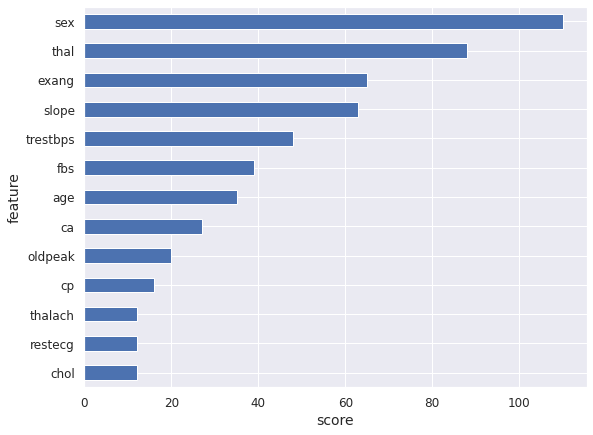

In [ ]:
final_scores=pd.Series(np.array(feature_selection['multi_score']),np.array(feature_selection['feature']))
plt.figure(figsize=(9,7))
final_scores.plot(kind='barh')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('score', fontsize=14)
plt.ylabel('feature', fontsize=14)
plt.savefig('final_scores.eps')
plt.show()
#files.download('final_scores.eps')

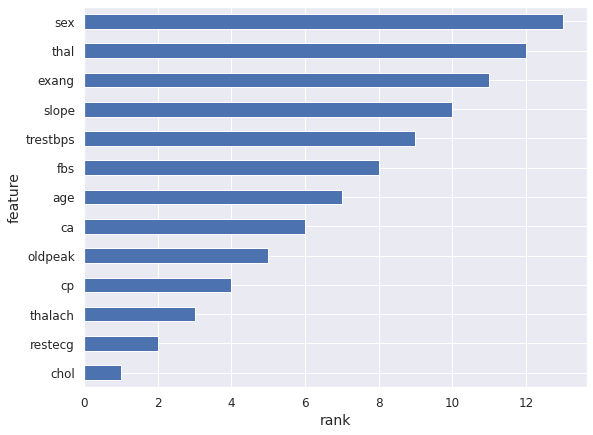

In [ ]:
final_ranks=pd.Series(np.array(feature_selection['final_rank']),np.array(feature_selection['feature']))
plt.figure(figsize=(9,7))
final_ranks.plot(kind='barh')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('rank', fontsize=14)
plt.ylabel('feature', fontsize=14)
plt.savefig('rank.eps')
plt.show()
#files.download('final_ranks.eps')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM1

NUM_CLUSTERS = 2
MAX_ITERATIONS = 10
COLORS = ['red', 'blue']

def print_results(means_clusters, probability_clusters, label_cluster_points):
    print('\n\nFINAL RESULT:')
    for i, c in enumerate(means_clusters):
        print('\tCluster %d' % (i + 1))
        print('\t\tNumber Points in Cluster %d' % label_cluster_points.count(i))
        print('\t\tCentroid: %s' % str(means_clusters[i]))
        print('\t\tProbability: %02f%%' % (probability_clusters[i] * 100))


def plot_ellipse(center, covariance, alpha, color):
    # eigenvalues and eigenvector of matrix covariance
    eigenvalues, eigenvector = np.linalg.eigh(covariance)
    order = eigenvalues.argsort()[::-1]
    eigenvector = eigenvector[:, order]

    # Calculate Angle of ellipse
    angle = np.degrees(np.arctan2(*eigenvector[:, 0][::-1]))

    # Calculate with, height
    width, height = 4 * np.sqrt(eigenvalues[order])

    # Ellipse Object
    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle,
                      alpha=alpha, color=color)

    ax = plt.gca()
    ax.add_artist(ellipse)

    return ellipse


def plot_results(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters):
    plt.figure(figsize=(10,10))
    plt.plot()
    for nc in range(len(means_clusters)):
        # Plot points in cluster
        points_cluster = list()
        for i, p in enumerate(label_cluster_points):
            if p == nc:
                plt.plot(points[i][0], points[i][1], linestyle='None',
                         color=COLORS[nc], marker='.')
                points_cluster.append(points[i])
        # Plot mean
        mean = means_clusters[nc]
        plt.plot(mean[0], mean[1], 'o', markerfacecolor=COLORS[nc],
                 markeredgecolor='k', markersize=10)

        # Plot Ellipse
        plot_ellipse(mean, covars_matrix_clusters[nc], 0.2, COLORS[nc])
        plt.xlabel('PC1', fontsize=14)
        plt.ylabel('PC2', fontsize=14)
        plt.xticks(size = 12)
        plt.yticks(size = 12)
    plt.savefig('EM-Clustering.eps')
    plt.show()
    files.download('EM-Clustering.eps')

def expectation_maximization(dataset, num_clusters, max_iterations):
    # Read data set
    points = dataset.values

    # Object GMM
    gmm = GMM1(n_components=num_clusters, covariance_type='full',n_init=max_iterations)

    # Estimate Model (params='wmc'). Calculate, w=weights, m=mean, c=covars
    gmm.fit(points)

    # Predict Cluster of each point
    label_cluster_points = gmm.predict(points)

    means_clusters = gmm.means_
    probability_clusters = gmm.weights_
    covars_matrix_clusters = gmm.covariances_

    # Print final result
    print_results(means_clusters, probability_clusters,
                  label_cluster_points.tolist())

    # Plot Final results
    plot_results(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters)

#PCA

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler = preprocessing.StandardScaler()

#final_dataset = dataset[['restecg','fbs','chol','age']]
final_dataset = dataset[['chol','restecg','thalach','cp']]
scaler.fit(final_dataset)
final_X_scaled_array = scaler.transform(final_dataset)
final_X_scaled = pd.DataFrame(final_X_scaled_array, columns = final_dataset.columns)

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(final_X_scaled)
final_X_pca_array = pca.transform(final_X_scaled)
final_X_pca = pd.DataFrame(final_X_pca_array, columns=['PC1','PC2'])
final_X_pca.head(10)

,PC1,PC2
0,1.073936,0.967025
1,1.923842,0.315303
2,0.572025,0.463003
3,1.125579,-0.242502
4,-0.609781,0.749030
5,-0.068420,-1.501322
6,-0.472713,1.286774
7,0.831211,0.015550
8,1.542334,-0.709492
9,2.050681,-0.908124


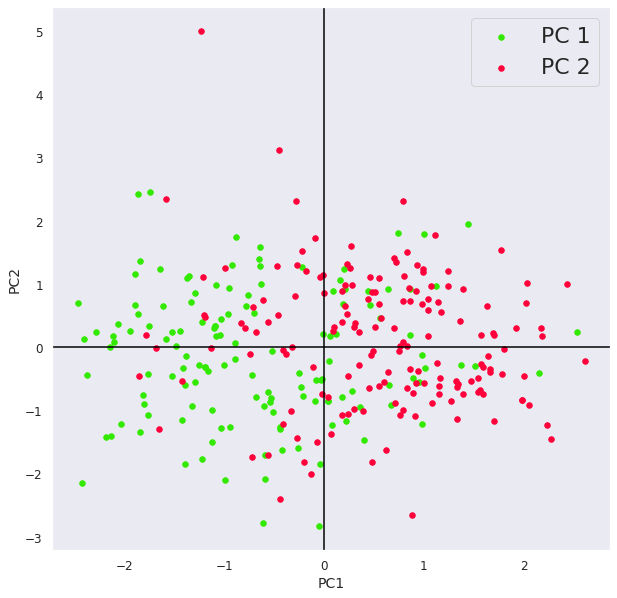

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files

y = dataset['target']

def plotData(df, groupby):
    #plt.figure(figsize=(15,7), facecolor='w')
    fig, ax = plt.subplots(figsize=(10,10), facecolor='w')
    # color map
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        i=i+1
        cluster.plot(ax = ax, kind = 'scatter', x = 'PC1', y = 'PC2', color = cmap(i/(4-1)), label = "%s %i" % (groupby, i), s=30) # dot size  
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.tick_params(axis='both', which='major', labelsize=12)
    #ax.set_title("Principal Components Analysis (PCA) ");

df_plot = final_X_pca.copy()
df_plot['PC'] = y
plotData(df_plot, 'PC')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('pca.eps')
plt.show()
files.download('pca.eps')

#EM Clustering



FINAL RESULT:
	Cluster 1
		Number Points in Cluster 146
		Centroid: [-0.92207676 -0.2037378 ]
		Probability: 47.777143%
	Cluster 2
		Number Points in Cluster 157
		Centroid: [0.84358068 0.18639368]
		Probability: 52.222857%


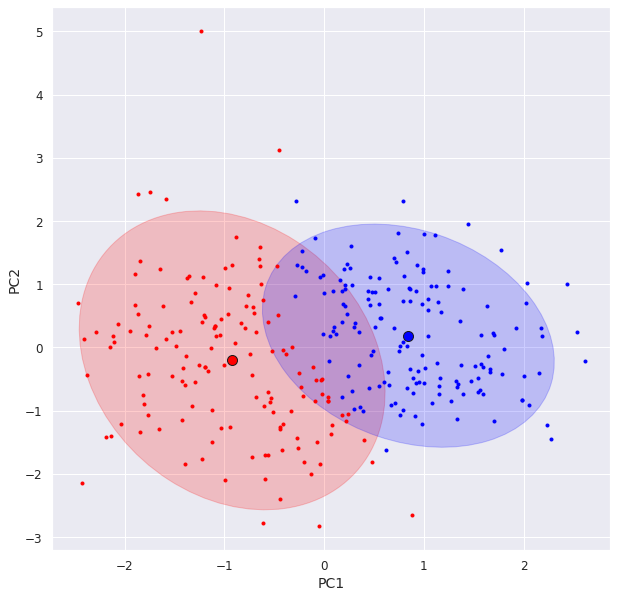

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
em=expectation_maximization(final_X_pca, NUM_CLUSTERS,MAX_ITERATIONS)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

#SVM


Weights:
 [0.54618013 0.45381987]

Means:
 [[ 0.79279515  0.25100905]
 [-0.95414277 -0.30209376]]

Type of covariance_GMM:
 <class 'numpy.ndarray'>
[0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 0]

The best paramters are for SVM: 
 {'C': 0.1, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}

Fold:1, Train set: 202, Test set:101
Fold:2, Train set: 202, Test set:101
Fold:3, Train set: 202, Test set:101

Processing K-fold CV !!!
Scor

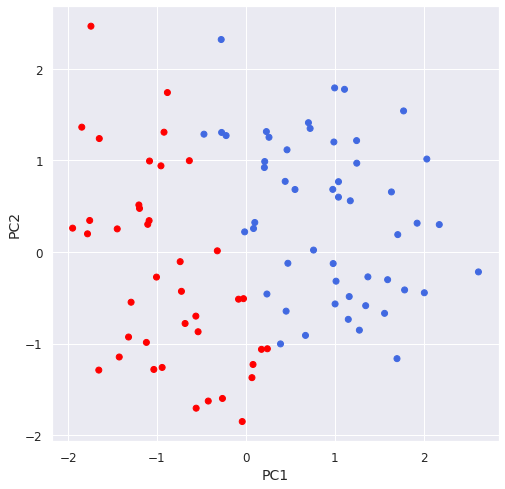


predicted values are :
 [1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1]



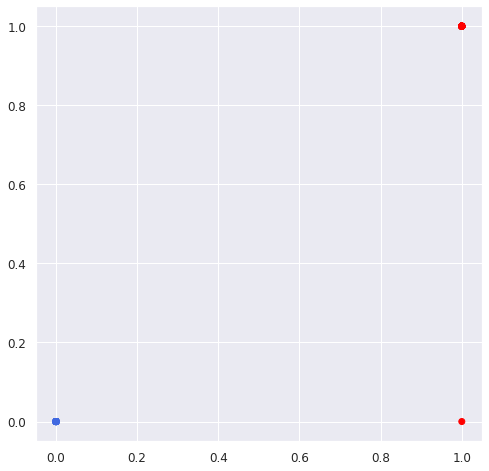


no.of predictions made are 
 (91,)

the predicted data to actual data for the given input data is shown below 

          PC1       PC2  actual  Predicted
113  0.174047 -1.062027       1          1
249  0.206597  0.922853       0          0
18   0.235203 -0.457943       0          0
142  1.783121 -0.413417       0          0
299  0.980101 -0.125349       0          0
270 -1.089254  0.343126       1          1
294 -0.042469 -1.849996       1          1
162  1.697552 -1.163375       0          0
13   1.039587  0.599596       0          0
24   2.613197 -0.216732       0          0


In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut

scale = MinMaxScaler()
y = dataset['target']
x = scale.fit_transform(final_dataset)

colors = ['royalblue','red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

seed=0

GMM = GMM1(n_components=2, covariance_type='tied',n_init=50,random_state=3)
res_GMM = GMM.fit(final_X_pca)

weights_GMM = GMM.weights_
print()
print("Weights:\n",weights_GMM)

means_GMM = GMM.means_
print()
print("Means:\n",means_GMM)

covariance_GMM = GMM.covariances_
print()
print("Type of covariance_GMM:\n",type(covariance_GMM))

covariance_GMM.size

y = res_GMM.predict(final_X_pca)
print(y)

#plt.scatter(final_X_pca['PC1'], final_X_pca['PC2'],c=vectorizer(y))

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(final_X_pca,y,test_size=0.3,random_state=4)

kf =KFold(n_splits=3, shuffle=True, random_state=2)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

grd1 = GridSearchCV(estimator = SVC(),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                  }, cv=3,verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x_train,y_train)

print()
best_parameters = grid1.best_params_
print("The best paramters are for SVM: \n",best_parameters)

best_model1 = SVC(kernel='linear',C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=50, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

#scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

#scores = cross_validate(best_model1, final_X_pca, y, cv=3, scoring=scoring, return_train_score = True)

print()
#print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(final_X_pca, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

#K-fold
print()
print("Processing K-fold CV !!!")
score = cross_val_score(best_model1, final_X_pca, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

#Stratified K-fold
print()
print("Processing Stratified K-fold CV !!!")
score = cross_val_score(best_model1, final_X_pca, y, cv= skf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

print()
y_pred_svm =best_model1.predict(x_test)

print()
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix for the model is shown below \n")
print(cm_svm)

print("Accuracy is :",accuracy_score(y_test,y_pred_svm))
print("Precision is :",precision_score(y_test,y_pred_svm))
print("Recall is :",recall_score(y_test,y_pred_svm))
print("F1-score is :",f1_score(y_test,y_pred_svm))

print()
print("given input is ,\n",x_test)
plt.scatter(x_test['PC1'], x_test['PC2'],c=vectorizer(y_test))
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', size = 14)
plt.ylabel('PC2',size=14)
plt.savefig('test_data.eps')
plt.show()
#files.download('test_data.eps')

print()
print("predicted values are :\n", y_pred_svm)
print()
plt.scatter(y_test, y_pred_svm,c=vectorizer(y_test))
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('result_test_data.eps')
plt.show()
#files.download('result_test_data.eps')

predicted_data = pd.DataFrame().assign(PC1=x_test['PC1'], PC2=x_test['PC2'],actual=y_test,Predicted = y_pred_svm)

print()
print("no.of predictions made are \n",y_pred_svm.shape)
print()

print("the predicted data to actual data for the given input data is shown below \n")

print(predicted_data.head(10))

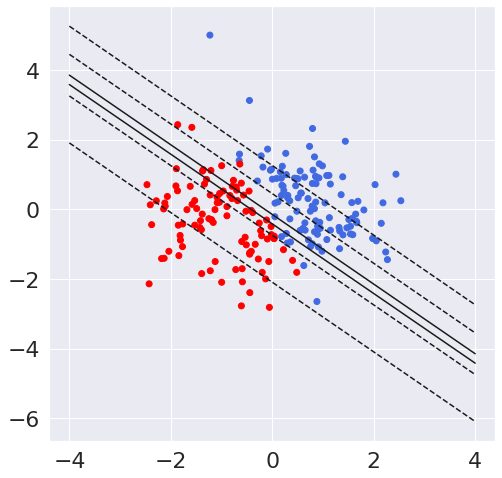

In [ ]:
w=best_model1.coef_
b=best_model1.intercept_

def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[0]

plt.scatter(x_train['PC1'], x_train['PC2'],c=vectorizer(y_train))

# w.x + b = 0
a0 = -4; a1 = f(a0, w, b)
b0 = 4; b1 = f(b0, w, b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, w, b, 1)
b0 = 4; b1 = f(b0, w, b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, w, b, -1)
b0 = 4; b1 = f(b0, w, b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

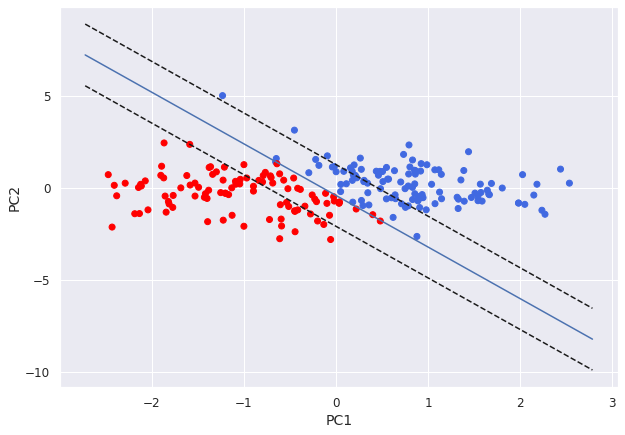

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(x_train['PC1'], x_train['PC2'], c=vectorizer(y_train));
ax = plt.gca()
xlim = ax.get_xlim()
w = best_model1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - best_model1.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (best_model1.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (best_model1.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('SVM_train.eps')
plt.show()
files.download('SVM_train.eps')

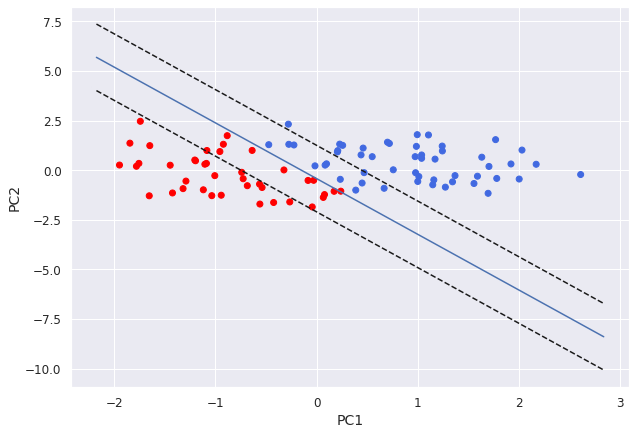

In [ ]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(x_test['PC1'], x_test['PC2'], c=vectorizer(y_test));
ax = plt.gca()
xlim = ax.get_xlim()
w = best_model1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - best_model1.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (best_model1.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (best_model1.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('SVM_test.eps')
plt.show()
#files.download('SVM_test.eps')

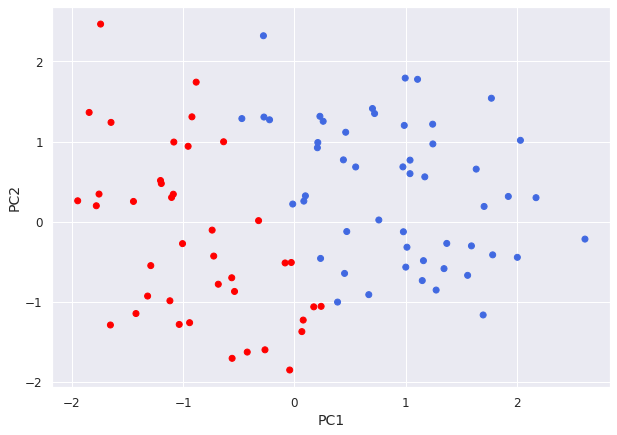

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(x_test['PC1'], x_test['PC2'], c=vectorizer(y_test));
ax = plt.gca()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('plot_SVM_test.eps')
plt.show()
files.download('plot_SVM_test.eps')

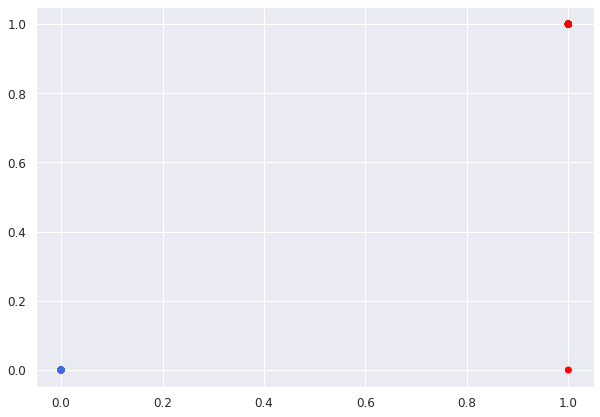

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(y_test, y_pred_svm,c=vectorizer(y_test))
ax = plt.gca()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('plot_pred.eps')
plt.show()
files.download('plot_pred.eps')